## Movie Recommendation system (visa)

In [9]:
from movielens import *
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sys
import time
import pickle
import pandas as pd

## analysing the data

In [10]:
r_cols = ['user_id', 'movie_id', 'rating']
dataset = pd.read_csv('u.data', sep='\t', names=r_cols, usecols=range(3))
dataset.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


## Testing

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [51]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [53]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [56]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [57]:
#We can merge them together
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Visualization Imports

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [59]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [60]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [61]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [62]:
#Now set the number of ratings column
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

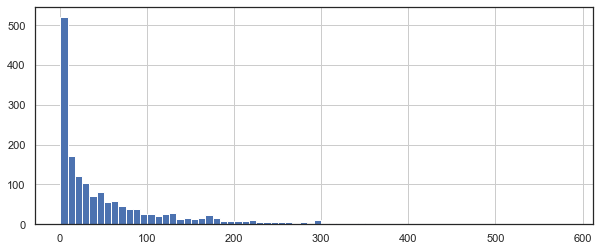

In [63]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

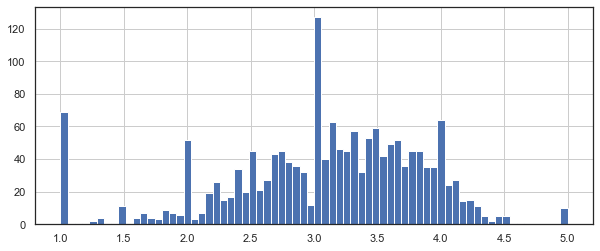

In [64]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

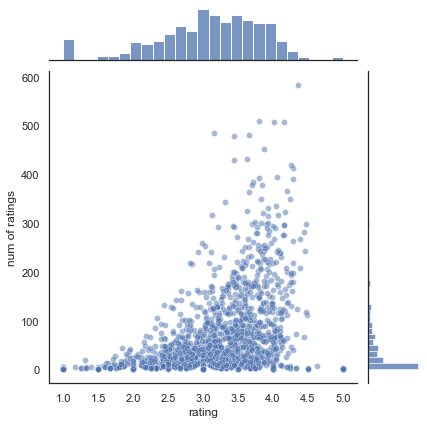

In [65]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [75]:
#Most rated movie
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [68]:
#Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.
#Now let's grab the user ratings for those two movies:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [69]:
#We can then use corrwith() method to get correlations between two pandas series:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\AHMED\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\AHMED\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [70]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [71]:
#Now if we sort the dataframe by correlation, we should get the most similar movies,
#however note that we get some results that don't really make sense.
#This is because there are a lot of movies only watched once by users who also watched star wars
#(it was the most popular movie).
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [72]:
#Let's fix this by filtering out movies that have less than 100 reviews
#(this value was chosen based off the histogram from earlier).
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [73]:
#Now sort the values and notice how the titles make a lot more sense
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [74]:

#Now the same for the comedy Liar Liar:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## -----------------------------------------------------------------

In [78]:
movieProperties = dataset.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [79]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.774914
2,0.223368
3,0.152921
4,0.357388
5,0.146048


In [80]:
movieDict = {}
with open(r'u.item', encoding="ISO-8859-1") as f:
    temp = ''
    for line in f:
        #line.encode().decode("ISO-8859-1")
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)), movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))

In [81]:
print(movieDict[2])

('GoldenEye (1995)', array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 0.22336769759450173, 3.2061068702290076)


## Computing the Distance

In [82]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

ComputeDistance(movieDict[1], movieDict[4])

1.084192439862543

In [83]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 2
avgRating = 0

print(movieDict[40], '\n')
neighbors = getNeighbors(1, K) # Toy Story (1995)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print (movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

avgRating /= K

('To Wong Foo, Thanks for Everything! Julie Newmar (1995)', array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.09621993127147767, 2.8947368421052633) 

Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537


In [84]:
avgRating

3.4847432095278443

In [85]:
df1 = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])
df2 = pd.read_csv("u.item", sep="|", encoding="iso-8859-1",names=["item_id","item_name","date","unknown1"
"website","rat1","rat2","rat3","rat4","rat5","rat6","rat7","rat8","rat9","rat10","rat11","rat12","rat13",
"rat14","rat15","rat16","rat17","rat18","rat19","rat20"])
print(df1.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [86]:
df2 = df2.iloc[:,0:2]
df2.head()

,item_id,item_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [87]:
data = df1.merge(df2,on="item_id")
data.drop(['timestamp'],inplace=True,axis=1)
data.head()

,user_id,item_id,rating,item_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [88]:
data_table = pd.pivot_table(data,values='rating',columns='item_name',index='user_id')
data_table.head()

item_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


## movies suggestion

In [89]:
print("here are a list of 20 movies to recommend to a user who has liked 'Liar Liar (1997)'")
print(data_table.corr()['Liar Liar (1997)'].sort_values(ascending=False).iloc[:5])

here are a list of 20 movies to recommend to a user who has liked 'Liar Liar (1997)'
item_name
To Live (Huozhe) (1994)               1.0
Mina Tannenbaum (1994)                1.0
Nadja (1994)                          1.0
Journey of August King, The (1995)    1.0
Crows and Sparrows (1949)             1.0
Name: Liar Liar (1997), dtype: float64


## load the DATA into array

In [21]:
user = []
item = []
rating = []
rating_test = []

# Load the movie lens dataset into arrays
d = Dataset()
d.load_users("data/u.user", user)
d.load_items("data/u.item", item)
d.load_ratings("data/u.base", rating)
d.load_ratings("data/u.test", rating_test)

n_users = len(user)
n_items = len(item)


utility = np.zeros((n_users, n_items))
for r in rating:
    utility[r.user_id-1][r.item_id-1] = r.rating

# Finds the average rating for each user and stores it in the user's object
for i in range(n_users):
    rated = np.nonzero(utility[i])
    n = len(rated[0])
    if n != 0:
        user[i].avg_r = np.mean(utility[i][rated])
    else:
        user[i].avg_r = 0.

print (utility)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [22]:
test = np.zeros((n_users, n_items))
for r in rating_test:
    test[r.user_id - 1][r.item_id - 1] = r.rating

In [23]:
movie_genre = []
for movie in item:
    movie_genre.append([movie.unknown, movie.action, movie.adventure, movie.animation, movie.childrens, movie.comedy,
                        movie.crime, movie.documentary, movie.drama, movie.fantasy, movie.film_noir, movie.horror,
                        movie.musical, movie.mystery, movie.romance, movie.sci_fi, movie.thriller, movie.war, movie.western])

movie_genre = np.array(movie_genre)
cluster = KMeans(n_clusters=20)
cluster.fit_predict(movie_genre)
kmeans = KMeans(n_init=10)

In [24]:
utility_clustered = []
for i in range(0, n_users):
    average = np.zeros(19)
    tmp = []
    for m in range(0, 19):
        tmp.append([])
    for j in range(0, n_items):
        if utility[i][j] != 0:
            tmp[cluster.labels_[j] - 1].append(utility[i][j])
    for m in range(0, 19):
        if len(tmp[m]) != 0:
            average[m] = np.mean(tmp[m])
        else:
            average[m] = 0
    utility_clustered.append(average)

utility_clustered = np.array(utility_clustered)

In [25]:
print (utility_clustered)

[[3.         2.65       3.58333333 ... 3.         3.4        3.57142857]
 [0.         0.         4.22222222 ... 0.         0.         4.        ]
 [0.         3.         3.         ... 0.         2.         3.75      ]
 ...
 [0.         4.         0.         ... 0.         0.         3.5       ]
 [4.         4.25       4.75       ... 4.75       5.         4.        ]
 [4.5        3.59090909 2.         ... 3.         3.5        3.22222222]]


In [26]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

ComputeDistance(movieDict[1], movieDict[4])

1.084192439862543

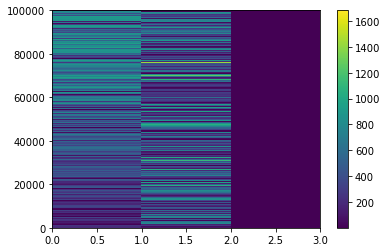

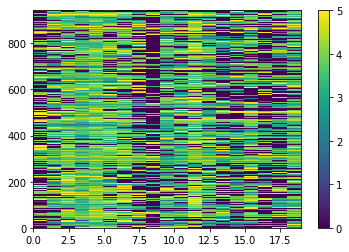

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#x, y = np.meshgrid(x, y)
plt.pcolormesh(dataset)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show()
plt.pcolormesh(utility_clustered)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show()

## using the surprise 

In [28]:
## importing all the libraries 

from surprise import KNNWithMeans
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
## load the dataset
data=Dataset.load_builtin('ml-100k')

In [3]:
## k=20 and c=3 

training,testing=train_test_split(data,test_size=.213) ## spliting data into traing part ad testing part 
model=KNNWithMeans(k=20,sim_options={'name':'pearson_baseline','user_based':True},cv=3) ## define the model
model.fit(training) ## train model on the trainig data

predict_=model.test(testing) ## testing model on testing data 

pred=[] ## store estimate value in the list 
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [4]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7314938805630459


In [5]:
## k=20 and c=4 

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=20,sim_options={'name':'pearson_baseline','user_based':True},cv=4)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [6]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7331266453660872


In [7]:
## k=20 and c=5 

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=20,sim_options={'name':'pearson_baseline','user_based':True},cv=5)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [8]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7299947605899276


In [9]:
## k=40 and c=3 

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=40,sim_options={'name':'pearson_baseline','user_based':True},cv=3)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [10]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7291841091581948


In [11]:
## k=40 and c=4 

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=40,sim_options={'name':'pearson_baseline','user_based':True},cv=4)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [12]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7340145299998069


In [13]:
## k=40 and c=5

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=40,sim_options={'name':'pearson_baseline','user_based':True},cv=5)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [14]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7266999538607308


In [15]:
## k=60 and c=3 

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=60,sim_options={'name':'pearson_baseline','user_based':True},cv=3)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7290738749830423


In [17]:
## k=60 and c=4

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=60,sim_options={'name':'pearson_baseline','user_based':True},cv=4)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [18]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.7265553339140375


In [19]:
## k=60 and c=5

training,testing=train_test_split(data,test_size=.213)
model=KNNWithMeans(k=60,sim_options={'name':'pearson_baseline','user_based':True},cv=5)
model.fit(training)

predict_=model.test(testing)

pred=[]
actual=[]
for i in predict_:
    actual.append(i[2])
    pred.append(i[3])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [20]:
print(f'MAE is {mean_absolute_error(pred,actual)}')

MAE is 0.728462647526276


In [25]:
# for prediction

predict_result=model.predict('788','151')
predict_result

Prediction(uid='788', iid='151', r_ui=None, est=3.420026468145563, details={'actual_k': 60, 'was_impossible': False})

In [3]:
goal = pd.read_csv('Goals.csv')
goal.head()

,Results:,K = 20,K=40,K=60
0,C = 3,"""0.7314938805630459""","""0.7291841091581948""","""0.7290738749830423"""
1,C = 5,"""0.7299947605899276""","""0.7266999538607308""","""0.728462647526276"""
2,C = 10,"""0.7335802939898817""","""0.730651166957825""","""0.732490123601805"""


In [23]:
testing

[('429', '25', 4.0),
 ('25', '257', 4.0),
 ('788', '151', 1.0),
 ('840', '655', 5.0),
 ('487', '426', 3.0),
 ('589', '294', 5.0),
 ('927', '79', 3.0),
 ('468', '427', 5.0),
 ('577', '1271', 3.0),
 ('414', '895', 4.0),
 ('234', '622', 2.0),
 ('761', '282', 4.0),
 ('882', '275', 5.0),
 ('586', '33', 5.0),
 ('833', '923', 5.0),
 ('639', '371', 1.0),
 ('58', '463', 3.0),
 ('103', '405', 3.0),
 ('648', '407', 4.0),
 ('168', '151', 5.0),
 ('508', '506', 5.0),
 ('109', '229', 5.0),
 ('617', '644', 4.0),
 ('78', '237', 5.0),
 ('852', '472', 3.0),
 ('702', '687', 1.0),
 ('185', '50', 4.0),
 ('468', '144', 5.0),
 ('189', '492', 3.0),
 ('423', '591', 5.0),
 ('593', '807', 4.0),
 ('425', '895', 4.0),
 ('60', '405', 4.0),
 ('508', '50', 5.0),
 ('268', '421', 3.0),
 ('854', '1077', 3.0),
 ('500', '319', 4.0),
 ('95', '196', 4.0),
 ('167', '698', 4.0),
 ('880', '1157', 4.0),
 ('321', '496', 4.0),
 ('15', '249', 1.0),
 ('804', '144', 4.0),
 ('392', '813', 3.0),
 ('805', '142', 4.0),
 ('195', '797', 3.